<a href="https://colab.research.google.com/github/Indian966/JBNU_BigData_Analyze/blob/master/channel_link_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests
!$ pip install beautifulsoup4

/bin/bash: $: command not found



<!DOCTYPE doctype html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="tw
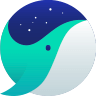
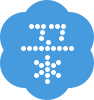

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("http://www.naver.com")  
bsObject = BeautifulSoup(html, "html.parser") 
print(bsObject) # 웹 문서 전체가 출력

print(bsObject.head.title) # <title>NAVER</title> 출력

for meta in bsObject.head.find_all('meta'):
    print(meta.get('content')) # 모든 메타 데이터의 내용 출력

print (bsObject.head.find("meta", {"name":"description"})) # 원하는 태그의 내용 출력

for link in bsObject.find_all('a'):
    print(link.text.strip(), link.get('href'))

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

# 교보문고의 베스트셀러 웹페이지를 가져옵니다.

html = urlopen('http://www.kyobobook.co.kr/bestSellerNew/bestseller.laf')
bsObject = bs(html, "html.parser")

# 책의 상세 웹페이지 주소를 추출하여 리스트에 저장합니다.
book_page_urls = []
for cover in bsObject.find_all('div', {'class':'detail'}):
    link = cover.select('a')[0].get('href')
    book_page_urls.append(link)

# 메타 정보로부터 필요한 정보를 추출합니다.메타 정보에 없는 저자 정보만 따로 가져왔습니다.   
for index, book_page_url in enumerate(book_page_urls):
    html = urlopen(book_page_url)
    bsObject = bs(html, "html.parser")
    title = bsObject.find('meta', {'property':'rb:itemName'})
    author = bsObject.select('span.name a')[0].text
    image = bsObject.find('meta', {'property':'rb:itemImage'})
    url = bsObject.find('meta', {'property':'rb:itemUrl'})
    originalPrice = bsObject.find('meta', {'property': 'rb:originalPrice'})
    salePrice = bsObject.find('meta', {'property':'rb:salePrice'})

    print(index+1, title, author, image, url, originalPrice, salePrice)

1 None 김난도 None None None None
2 None 주언규 None None None None
3 None ¿¡¸¯ ¿ÍÀÌ³Ê None None None None
4 None 이미예 None None None None
5 None 이미예 None None None None


KeyboardInterrupt: ignored

In [7]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

# 교보문고의 베스트셀러 웹페이지를 가져옵니다.

html = urlopen('https://socialerus.com//Ranking/Detail?id=UCO5p-c9u1-fi3E6EeRQKJig')
bsObject = bs(html, "html.parser")
bsObject

<!-- Global site tag (gtag.js) - Google Analytics  -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-48219811-3"></script>
<script>
    window.dataLayer = window.dataLayer || [];
    function gtag() { dataLayer.push(arguments); }
    gtag('js', new Date());

    gtag('config', 'UA-48219811-3');
</script>
<script src="/lib/jquery/dist/jquery.js"></script>
<script src="/js/jquery.cookie.js"></script>
<script src="/lib/bootstrap/dist/js/bootstrap.bundle.min.js"></script>
<script src="/js/site.js?v=dLGP40S79Xnx6GqUthRF6NWvjvhQ1nOvdVSwaNcgG18"></script>
<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="ko" http-equiv="content-language"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, user-scalable=no, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="all" name="robots"/>
<meta content="필로비즈 PhiloBiz Inc

In [6]:
page_urls = []
for cover in bsObject.find_all('div'):
    print(cover)
    link = cover.select('div')[0].get('onclick')
    page_urls.append(link)
page_urls

<div class="cookie_alert" id="cookieAlert">
<div class="alert_cont">
<em>소셜러스 웹사이트는<br/>세션 및 쿠키를 활용하고 있습니다.</em>
<div>
                이 사이트를 탐색하고 정보를 습득하는 것은 이에 대해 동의함을 의미 합니다. 귀하는 이를 거부할 권리가 있고, 이 경우 소셜러스는 서비스/정보 제공을 거부할 수 있습니다.
                귀하는 언제든지 디바이스/운영체제 및 웹브라우저에서 저장된 쿠키를 삭제할 수 있으며, 로그인 세션은 1시간 후 서버에서 자동으로 삭제됩니다. 자세한 사항은 "법적고지" 페이지를 참고하시기 바랍니다.
            </div>
<div class="btn_wrap">
<button onclick="setCookieAgree();" style="width: 120px; height: 33px; line-height: 33px; color: #eee; font-size: 14px; background-color: #0a68c5; " type="button">동의함</button>
<button onclick="$('#cookieAlert').fadeOut(500); location.href = 'https://www.google.com';" style="width: 120px; height: 33px; line-height: 33px; color: #eee; font-size: 14px; background-color: #bf214a; " type="button">동의하지 않음</button>
</div>
</div>
</div>
<div class="alert_cont">
<em>소셜러스 웹사이트는<br/>세션 및 쿠키를 활용하고 있습니다.</em>
<div>
                이 사이트를 탐색하고 정보를 습득하는 것은 이에 대해 동의함을 의미 합니다. 귀하는 이를 거부할 권리가 있고, 이 경우 소셜러스는 서비스

IndexError: ignored


<!DOCTYPE doctype html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="tw
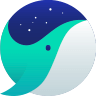
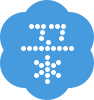
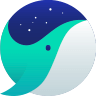
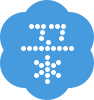

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.naver.com")  
bsObject = BeautifulSoup(html, "html.parser") 
print(bsObject) # 웹 문서 전체가 출력

print(bsObject.head.title) # <title>NAVER</title> 출력

for meta in bsObject.head.find_all('meta'):
    print(meta.get('content')) # 모든 메타 데이터의 내용 출력

print (bsObject.head.find("meta", {"name":"description"})) # 원하는 태그의 내용 출력

for link in bsObject.find_all('a'):
  print(link)
  print(link.text.strip(), link.get('href')) #a 태그로 둘러싸인 텍스트와 a 태그의 href 속성을 출력